In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import healpy as hp
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
from dipole import cmb_dipole
import tools

In [3]:
mapdir = '/scratch/aew492/quasars/maps'
NSIDE = 64
G = 20.5
sf_dip_cmbdir = tools.flatten_map(Table.read(os.path.join(mapdir,
                                    f'selection_function_NSIDE{NSIDE}_G{G}_cmbdipoledir.fits'), format='fits'))

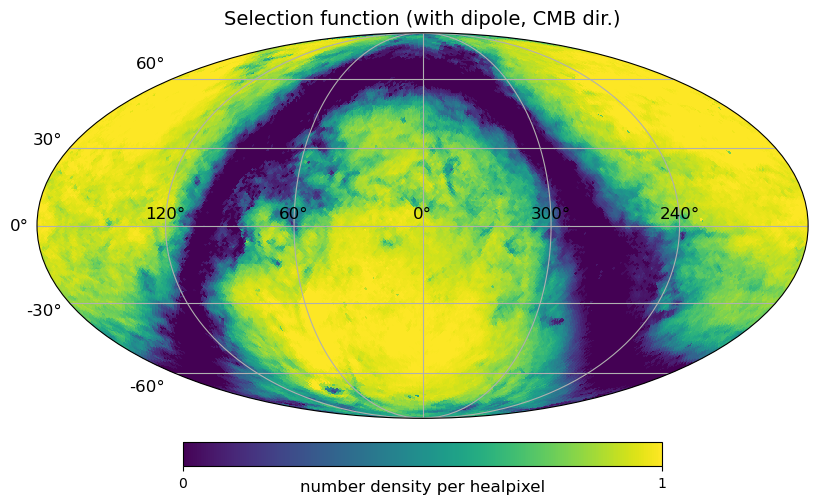

In [4]:
tools.plot_map(sf_dip_cmbdir, title='Selection function (with dipole, CMB dir.)',
               unit='number density per healpixel')

#### residuals with other selection functions

In [5]:
# no dipole
sf_nodip = tools.flatten_map(Table.read(os.path.join(mapdir,
                                    f'selection_function_NSIDE{NSIDE}_G{G}_nodipole.fits'), format='fits'))
res_nodip = sf_dip_cmbdir / sf_nodip

/state/partition1/job-35522326/ipykernel_3888343/4021735655.py:4: RuntimeWarning: invalid value encountered in divide
  res_nodip = sf_dip_cmbdir / sf_nodip


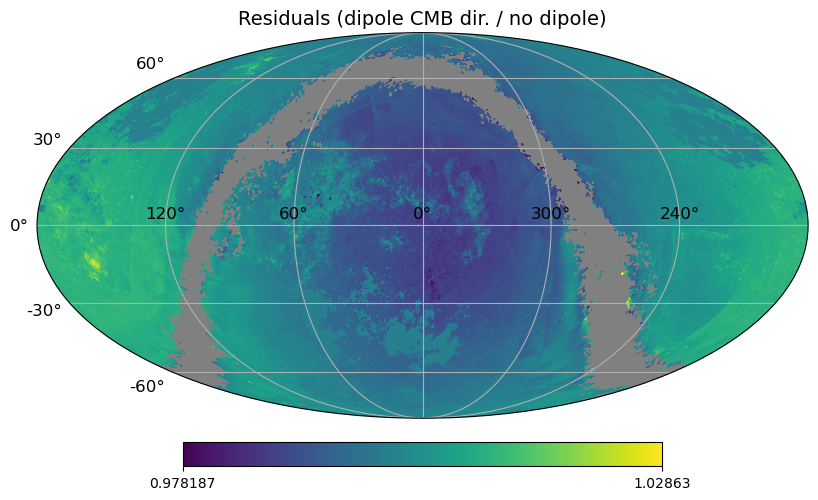

In [6]:
tools.plot_map(res_nodip, title='Residuals (dipole CMB dir. / no dipole)')

In [7]:
# dipole, free direction (3 components)
sf_dip = tools.flatten_map(Table.read(os.path.join(mapdir,
                                    f'selection_function_NSIDE{NSIDE}_G{G}_dipole.fits'), format='fits'))
res_dip = sf_dip_cmbdir / sf_dip

/state/partition1/job-35522326/ipykernel_3888343/3959887306.py:4: RuntimeWarning: invalid value encountered in divide
  res_dip = sf_dip_cmbdir / sf_dip


In [ ]:
tools.plot_map(res_dip, title='Residuals (dipole CMB dir. / dipole free dir.)', min=0.9, max=1.2)

#### recovered amplitudes

In [ ]:
# check out recovered dipole
fit_res = np.load(os.path.join(mapdir,
                        f'selection_function_NSIDE{NSIDE}_G{G}_cmbdipoledir-res.npy'), allow_pickle=True).item()
monopole, dipoleamp = fit_res['x'][:2]
monopole, dipoleamp, dipoleamp/monopole